In [1]:
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd
import matplotlib.pyplot as plt

print("Imports successful")

Imports successful


In [9]:
# home sttas
home_stats = leaguedashteamstats.LeagueDashTeamStats(
    season = '2024-25',
    location_nullable = 'Home',
    league_id_nullable = '00'
)
home_df = home_stats.get_data_frames()[0]
home_df = home_df[['TEAM_NAME', 'W', 'L', 'W_PCT', 'PTS', 'PLUS_MINUS']]
home_df.columns = ['TEAM_NAME', 'HOME_W', 'HOME_L', 'HOME_W_PCT', 'HOME_PTS',
                   'HOME_PLUS_MINUS']

# away stats
away_stats = leaguedashteamstats.LeagueDashTeamStats(
    season = '2024-25',
    location_nullable = 'Road',
    league_id_nullable = '00'
)
away_df = away_stats.get_data_frames()[0]
away_df = away_df[['TEAM_NAME', 'W', 'L', 'W_PCT', 'PTS', 'PLUS_MINUS']]
away_df.columns =  ['TEAM_NAME', 'AWAY_W', 'AWAY_L', 'AWAY_W_PCT', 'AWAY_PTS',
                   'AWAY_PLUS_MINUS']

# merge
splits_df = home_df.merge(away_df, on = 'TEAM_NAME')

print("Home/Away splits complete:")
print(splits_df.head())

Home/Away splits complete:
           TEAM_NAME  HOME_W  HOME_L  HOME_W_PCT  HOME_PTS  HOME_PLUS_MINUS  \
0      Atlanta Hawks      21      19       0.525      4729            -49.0   
1     Boston Celtics      28      13       0.683      4794            361.0   
2      Brooklyn Nets      12      29       0.293      4255           -359.0   
3  Charlotte Hornets      12      29       0.293      4361           -225.0   
4      Chicago Bulls      18      23       0.439      4779            -94.0   

   AWAY_W  AWAY_L  AWAY_W_PCT  AWAY_PTS  AWAY_PLUS_MINUS  
0      19      22       0.463      4860            -36.0  
1      33       8       0.805      4740            386.0  
2      14      27       0.341      4364           -224.0  
3       7      34       0.171      4257           -522.0  
4      21      20       0.512      4881            -34.0  


In [10]:
# home court adv - diff in win %
splits_df['HCA'] = (splits_df['HOME_W_PCT'] - splits_df['AWAY_W_PCT']) * 100

# sort by HCA
hca_ranked = splits_df.sort_values('HCA', ascending = False)

print("\nTeams with biggest home court advantage:")
print(hca_ranked[['TEAM_NAME', 'HOME_W_PCT', 'AWAY_W_PCT',
                  'HCA']].head(10).to_string(index = False))

print("\nTeams that perform better on road:")
print(hca_ranked[['TEAM_NAME', 'HOME_W_PCT', 'AWAY_W_PCT',
                  'HCA']].tail(5).to_string(index = False))


Teams with biggest home court advantage:
             TEAM_NAME  HOME_W_PCT  AWAY_W_PCT  HCA
    Los Angeles Lakers       0.756       0.463 29.3
          Phoenix Suns       0.585       0.293 29.2
           LA Clippers       0.732       0.488 24.4
        Indiana Pacers       0.725       0.500 22.5
Portland Trail Blazers       0.537       0.341 19.6
     San Antonio Spurs       0.500       0.325 17.5
  New Orleans Pelicans       0.341       0.171 17.0
       Milwaukee Bucks       0.659       0.500 15.9
       Toronto Raptors       0.439       0.293 14.6
      Dallas Mavericks       0.550       0.405 14.5

Teams that perform better on road:
         TEAM_NAME  HOME_W_PCT  AWAY_W_PCT   HCA
   Detroit Pistons       0.537       0.537   0.0
Washington Wizards       0.200       0.244  -4.4
     Brooklyn Nets       0.293       0.341  -4.8
     Chicago Bulls       0.439       0.512  -7.3
    Boston Celtics       0.683       0.805 -12.2


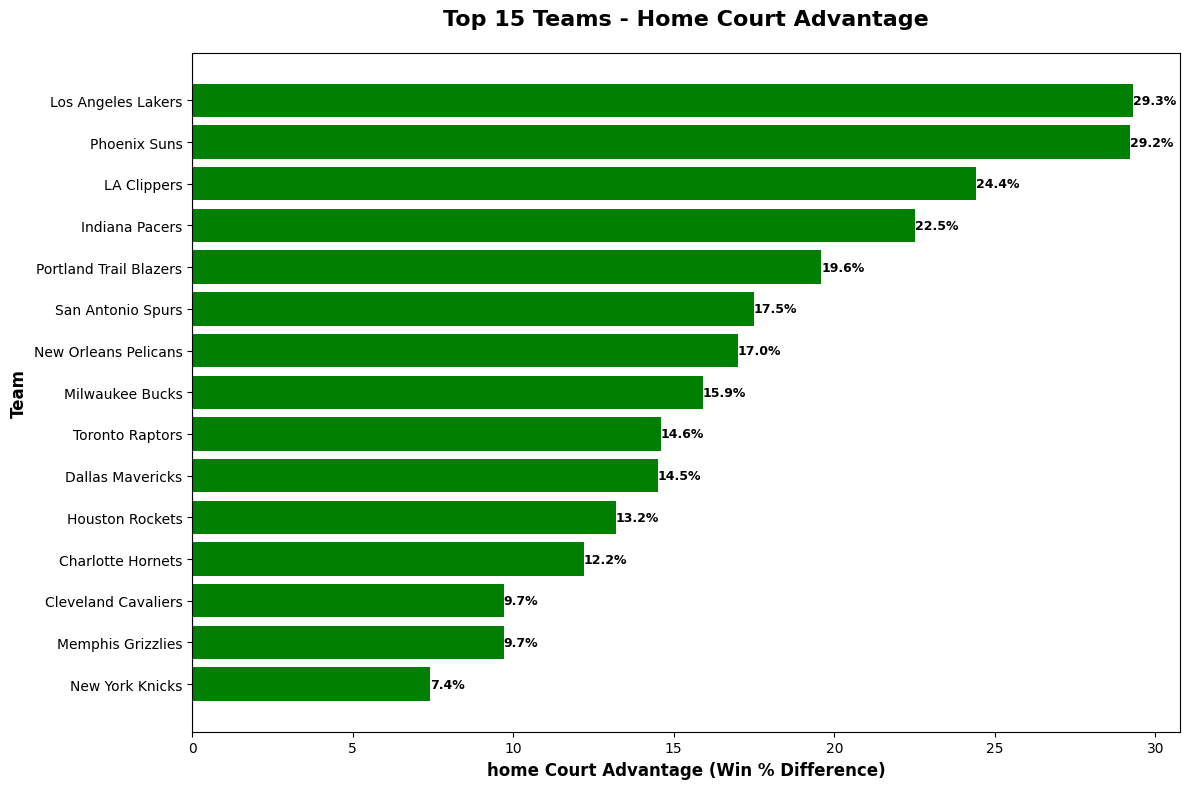


Average home court advantage: 8.9%


In [19]:
# HCA visual
top_hca = hca_ranked.head(15)

plt.figure(figsize = (12,8))
colors = ['green' if x > 0 else 'red' for x in top_hca['HCA']]
plt.barh(top_hca['TEAM_NAME'], top_hca['HCA'], color = colors)
plt.xlabel('home Court Advantage (Win % Difference)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Team', fontsize = 12, fontweight = 'bold')
plt.title('Top 15 Teams - Home Court Advantage', fontsize = 16, fontweight = 'bold', pad = 20)
plt.axvline(x = 0, color = 'black', linestyle = '-', linewidth = 0.8)
plt.gca().invert_yaxis()

for i, (team, hca) in enumerate(zip(top_hca['TEAM_NAME'], top_hca['HCA'])):
    plt.text(hca, i, f'{hca:.1f}%', va = 'center', fontsize = 9, fontweight = 'bold')

plt.tight_layout()
plt.savefig('../visualizations/home_court_advantage.png', dpi = 300, bbox_inches = 'tight')
plt.show()

print(f'\nAverage home court advantage: {splits_df['HCA'].mean():.1f}%')

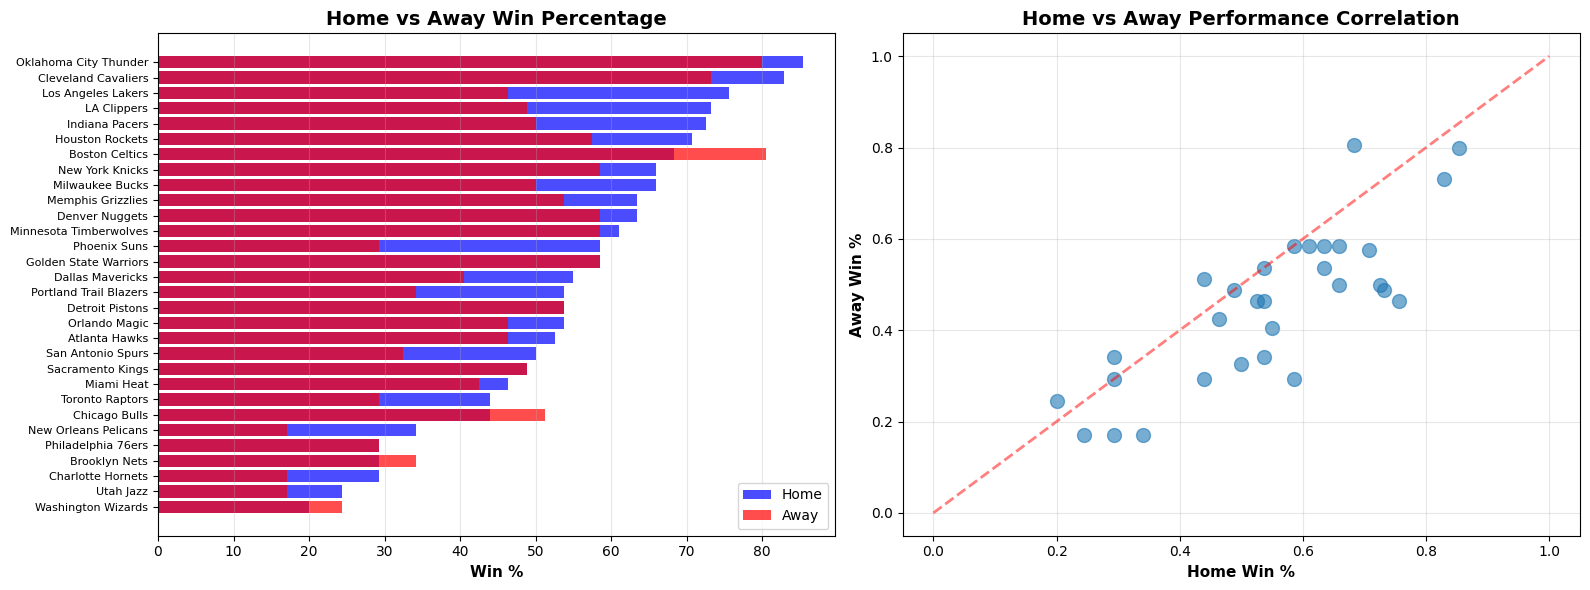


Correlation between home and away performance: 0.814


In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

# plot 1 win % comparison
teams_sorted = splits_df.sort_values('HOME_W_PCT', ascending = True)
y_pos = range(len(teams_sorted))

ax1.barh(y_pos, teams_sorted['HOME_W_PCT'] * 100, alpha = 0.7, label = 'Home', color = 'blue')
ax1.barh(y_pos, teams_sorted['AWAY_W_PCT'] * 100, alpha = 0.7, label = 'Away', color = 'red')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(teams_sorted['TEAM_NAME'], fontsize = 8)
ax1.set_xlabel('Win %', fontsize = 11, fontweight = 'bold')
ax1.set_title('Home vs Away Win Percentage', fontsize = 14, fontweight = 'bold')
ax1.legend()
ax1.grid(axis = 'x', alpha = 0.3)

# plot 2 scatter plot
ax2.scatter(splits_df['HOME_W_PCT'], splits_df['AWAY_W_PCT'], alpha = 0.6, s = 100)
ax2.plot([0,1], [0,1], 'r--', alpha = 0.5, linewidth = 2)
ax2.set_xlabel("Home Win %", fontsize = 11, fontweight = 'bold')
ax2.set_ylabel("Away Win %", fontsize = 11, fontweight = 'bold')
ax2.set_title("Home vs Away Performance Correlation", fontsize = 14, fontweight = 'bold')
ax2.grid(alpha = 0.3)

plt.tight_layout()
plt.savefig('../visualizations/home_away_comparison.png', dpi = 300, bbox_inches = 'tight')
plt.show()

corr = splits_df['HOME_W_PCT'].corr(splits_df['AWAY_W_PCT'])
print(f"\nCorrelation between home and away performance: {corr:.3f}")

In [17]:
# home / away splits
from nba_api.stats.endpoints import leaguedashplayerstats

# player home stats
player_home = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    location_nullable = 'Home',
    per_mode_detailed = 'PerGame',
    league_id_nullable = '00'
)
player_home_df = player_home.get_data_frames()[0]
player_home_df = player_home_df[['PLAYER_NAME', 'PTS']]
player_home_df.columns = ['PLAYER_NAME', 'HOME_PTS']

# player away stats
player_away = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    location_nullable = 'Road',
    per_mode_detailed = 'PerGame',
    league_id_nullable = '00'
)
player_away_df = player_away.get_data_frames()[0]
player_away_df = player_away_df[['PLAYER_NAME', 'PTS']]
player_away_df.columns = ['PLAYER_NAME', 'AWAY_PTS']

# merge
player_splits = player_home_df.merge(player_away_df, on = 'PLAYER_NAME')
player_splits['DIFF'] = player_splits['HOME_PTS'] - player_splits['AWAY_PTS']

# filter for relevance (15+ pts on road)
player_splits = player_splits[player_splits['AWAY_PTS'] > 15]

# find biggest loc differences
roadDom = player_splits.nsmallest(10, 'DIFF') # better on road
homeDom = player_splits.nlargest(10, 'DIFF') # better home

print("\nPlayers who perform better on the road:")
print(roadDom.to_string(index = False))

print("\nPlayers who perform better at home:")
print(homeDom.to_string(index = False))


Players who perform better on the road:
    PLAYER_NAME  HOME_PTS  AWAY_PTS  DIFF
    Joel Embiid      19.1      27.2  -8.1
  DeMar DeRozan      19.6      24.7  -5.1
    Luka Dončić      26.3      30.5  -4.2
  Mark Williams      13.2      17.3  -4.1
   Kyrie Irving      22.8      26.7  -3.9
  Chet Holmgren      13.2      17.0  -3.8
 Quentin Grimes      12.7      16.3  -3.6
  Kawhi Leonard      19.9      23.4  -3.5
  Collin Sexton      16.7      19.9  -3.2
Anthony Edwards      26.1      29.0  -2.9

Players who perform better at home:
      PLAYER_NAME  HOME_PTS  AWAY_PTS  DIFF
   Brandon Ingram      25.0      17.9   7.1
     Jaylen Brown      24.5      19.4   5.1
       RJ Barrett      23.4      18.8   4.6
     De'Aaron Fox      25.8      21.4   4.4
    Mikal Bridges      19.6      15.6   4.0
Tyrese Haliburton      20.4      16.7   3.7
    Anthony Davis      26.2      23.3   2.9
     Nikola Jokić      31.0      28.1   2.9
   Brandon Miller      22.5      19.7   2.8
   Andrew Wiggins   